In [1]:
from preamble import *
%matplotlib inline

# Introduction
### Why machine learning?
### Problems that machine learning can solve

### Knowing your data

## Why Python?

### What this book will cover
### What this book will not cover

## Scikit-learn
### Installing Scikit-learn

### Essential Libraries and Tools

#### Jupyter Notebook

#### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
x

array([[1, 2, 3],
       [4, 5, 6]])

#### SciPy

In [3]:
from scipy import sparse

# create a 2d numpy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("Numpy array:\n%s" % eye)

# convert the numpy array to a scipy sparse matrix in CSR format
# only the non-zero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy sparse CSR matrix:\n%s" % sparse_matrix)

Numpy array:
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

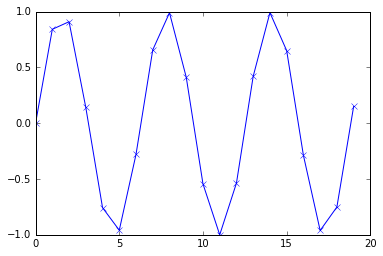

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of integers
x = np.arange(20)
# create a second array using sinus
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")


#### Pandas

In [5]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
data_pandas

,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


### Python2 versus Python3

### Versions Used in this Book

In [6]:
import pandas as pd
print("pandas version: %s" % pd.__version__)

import matplotlib
print("matplotlib version: %s" % matplotlib.__version__)

import numpy as np
print("numpy version: %s" % np.__version__)

import IPython
print("IPython version: %s" % IPython.__version__)

import sklearn
print("scikit-learn version: %s" % sklearn.__version__)

pandas version: 0.17.1
matplotlib version: 1.5.1
numpy version: 1.10.4
IPython version: 4.1.2
scikit-learn version: 0.18.dev0


## A First Application: Classifying iris species
### Meet the data

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
iris.keys()

dict_keys(['DESCR', 'data', 'target_names', 'feature_names', 'target'])

In [9]:
print(iris['DESCR'][:193] + "\n...")

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive att
...


In [10]:
iris['target_names']


array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [11]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [12]:
type(iris['data'])

numpy.ndarray

In [13]:
iris['data'].shape

(150, 4)

In [14]:
iris['data'][:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [15]:
type(iris['target'])

numpy.ndarray

In [16]:
iris['target'].shape

(150,)

In [17]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Measuring Success: Training and testing data

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                    random_state=0)

In [19]:
X_train.shape

(112, 4)

In [20]:
X_test.shape

(38, 4)

### First things first: Look at your data

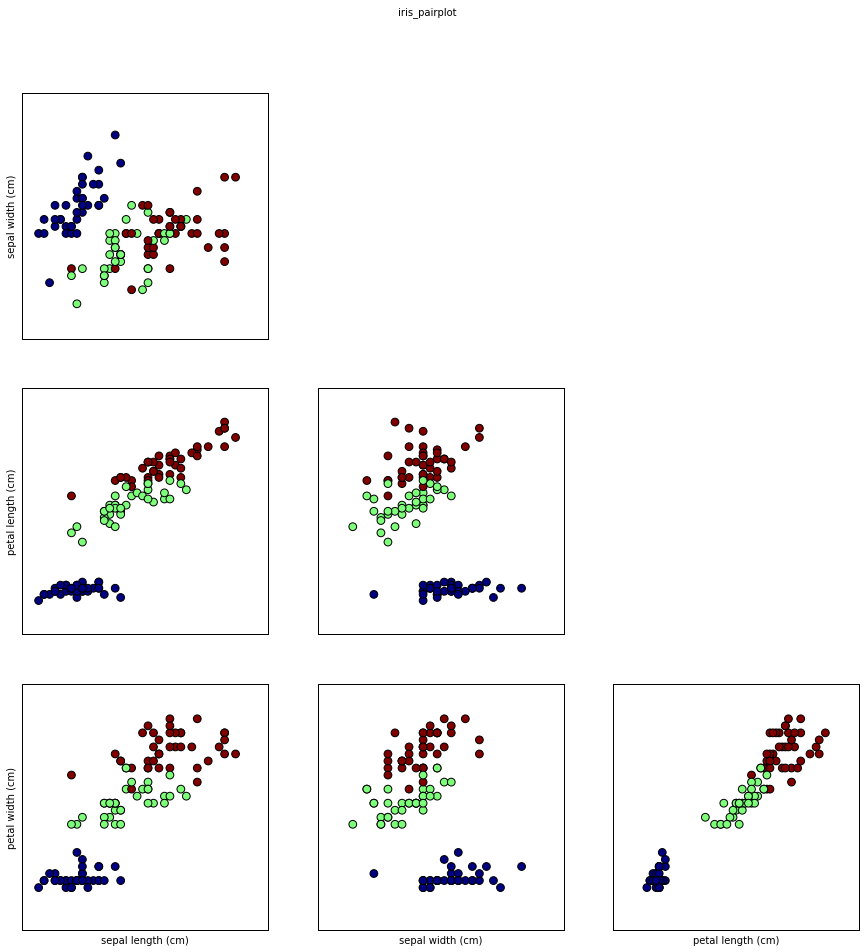

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("iris_pairplot")

for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)

### Building your first model: k nearest neighbors

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Making predictions

In [24]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

In [25]:
prediction = knn.predict(X_new)
prediction

array([0])

In [26]:
iris['target_names'][prediction]

array(['setosa'], 
      dtype='<U10')

### Evaluating the model

In [27]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.97368421052631582

In [28]:
knn.score(X_test, y_test)

0.97368421052631582

### Summary

In [29]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
                                                    random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.97368421052631582